__Multi-Class Prediction of Obesity Risk__
- 출처 : https://www.kaggle.com/competitions/playground-series-s4e2/overview (사용 데이터)
- 참고 : https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster (원본 데이터)

[개요]
- 다양한 요인을 활용해 비만 위험(obesity risk) 예측

[Columns] : 18 columns
- id
- Gender
- Age
- Height
- Weight
- family_history_with_overweight : family member suffered or suffers from overweight
- FAVC : Frequent consumption of high caloric food
- FCVC : Frequency of consumption of vegetables
- NCP : Number of main meals
- CAEC : Consumption of food between meals
- SMOKE : Smoker or not
- CH2O : Consumption of water daily
- SCC : Calories consumption monitoring
- FAF : Physical activity frequency
- TUE : Time using technology devices
- CALC : Consumption of alcohol
- MTRANS : Transportation used
- __NObeyesdad__ (target) : Obesity level deducted


[Evaluation]
- accuracy score

[Submission]
- id, NObeyesdad

# Data load

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
train = pd.read_csv("./data/Obesity Risk/train.csv")
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [117]:
train.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [118]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [119]:
train.describe(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


- 결측치 없음
- 크게 전처리 할 사항 없어 보임

In [120]:
# target
train["NObeyesdad"].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

# EDA

In [121]:
df = train.copy()
df.set_index("id", inplace=True)

In [122]:
# 수치형, 범주형 변수명 저장
num_list = list(df.select_dtypes("number").columns) # ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_list = list(df.select_dtypes("object").columns) # ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 
                                                    #  'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

## 시각화: 수치형
- 수치형 변수들의 분포를 확인.

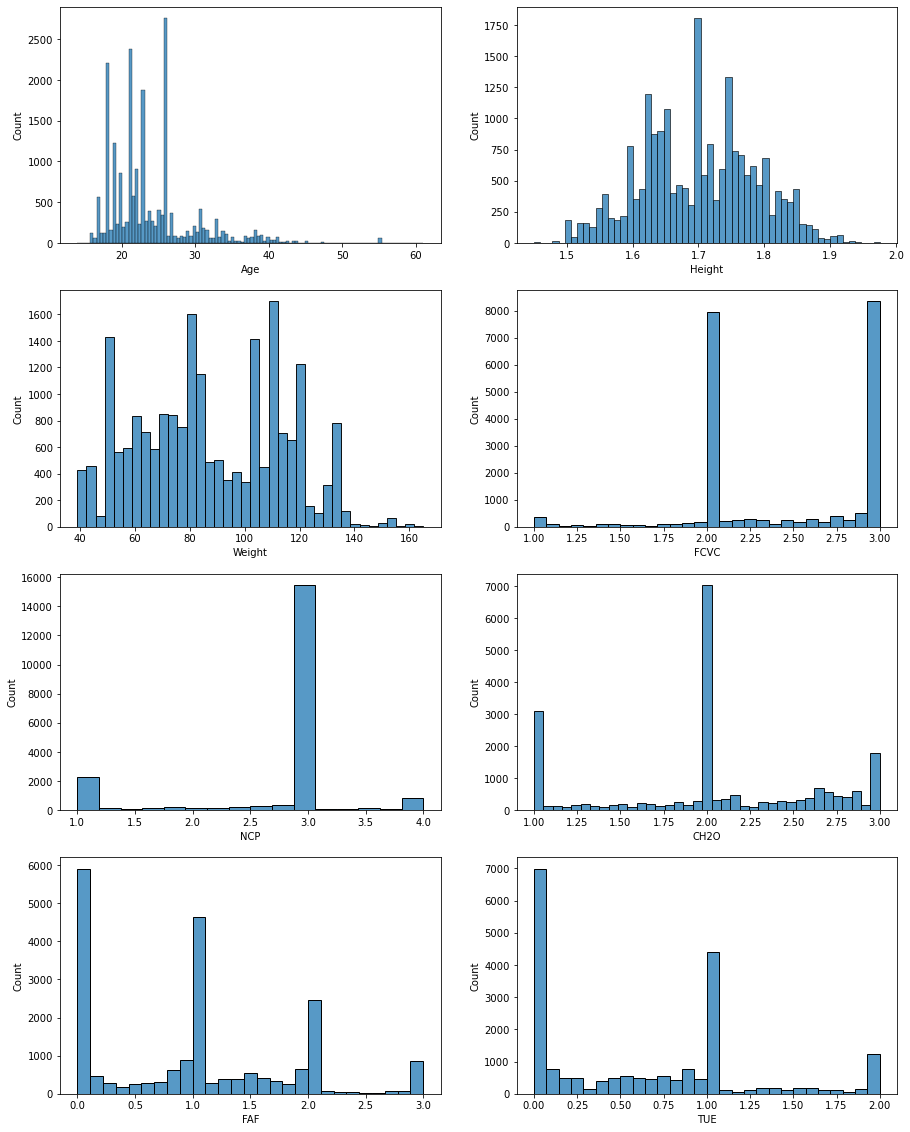

In [123]:
# 수치형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(num_list):
    sns.histplot(data=df[col_name], ax=axes[i//2, i%2])

- Age : 20대의 비중이 굉장히 높음. 원본 데이터가 익명의 survey를 통해 수집한 데이터인만큼, 표본 수집에서부터 차이가 나지 않았을까 싶다.
- FCVC, NCP, CH2O, FAF, TUE : 정수 값의 비율이 높음. 사실 정수 값만 나와야 할 것 같은데 소수 값은 어떻게 나온건지?

## 시각화: 범주형
- target 변수인 NObeyesdad 변수는 순서가 의미가 있으므로, 순서가 지정된 categorical data로 변환함.
- 범주형 변수별 비율의 차이를 확인.

In [124]:
# target 변수 : 순서 부여하기 -- categorical data로 변환
# 참고 : https://suy379.tistory.com/150

from pandas.api.types import CategoricalDtype

target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
                'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
ordered_NObe = CategoricalDtype(categories=target_order, ordered=True)

df["NObeyesdad"] = df["NObeyesdad"].astype(ordered_NObe)
df["NObeyesdad"].unique()

['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I']
Categories (7, object): ['Insufficient_Weight' < 'Normal_Weight' < 'Overweight_Level_I' < 'Overweight_Level_II' < 'Obesity_Type_I' < 'Obesity_Type_II' < 'Obesity_Type_III']

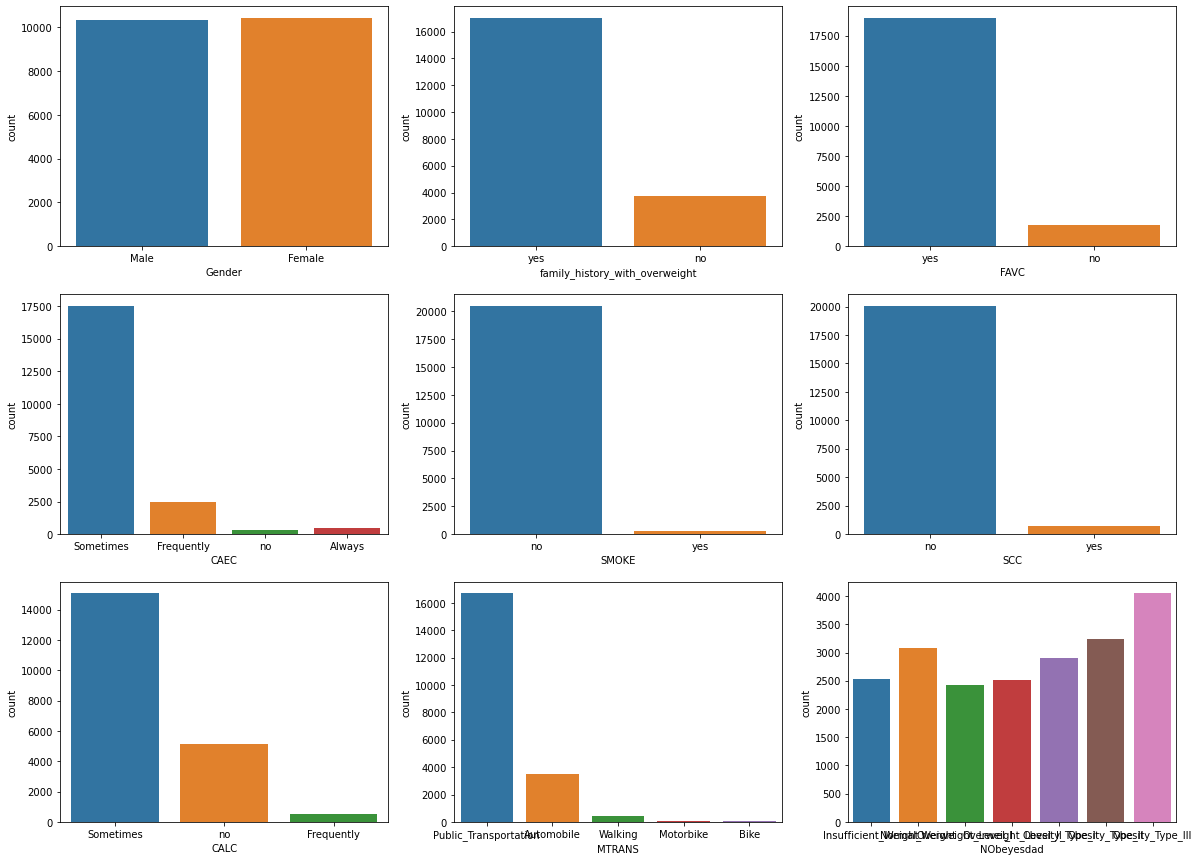

In [125]:
# 범주형 변수
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))

for i, col_name in enumerate(cat_list):
    sns.countplot(data=df, x=col_name, ax=axes[i//3, i%3])

- Gender와 NObeyesdad(target)을 제외한 다른 범주형 변수들은 하나의 값이 비중이 높은 편향된 데이터.

## target feature
- target 변수인 NObeyesdad 변수에 대해 자세히 확인.

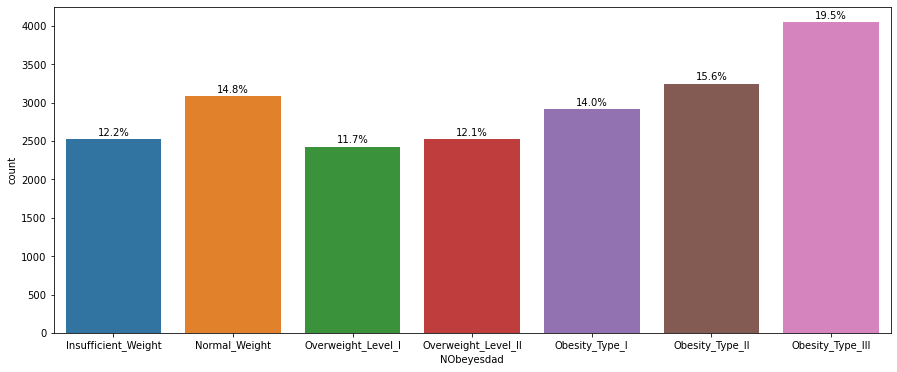

In [126]:
# target 변수 EDA

plt.figure(figsize=(15,6))
p = sns.countplot(data=df, x="NObeyesdad")

# 그래프 상단에 비율 표시
for patch in p.patches:
        p.annotate(format(patch.get_height() / df.shape[0] * 100, '.1f')+"%",
                   (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')

In [239]:
# 범주 4개로 통합
df["NObeyesdad_4"] = df["NObeyesdad"].apply(lambda x : x.split("_")[0])

# 순서 부여
ordered_NObe4 = CategoricalDtype(categories=['Insufficient', 'Normal', 'Overweight', 'Obesity'], ordered=True)
df["NObeyesdad_4"] = df["NObeyesdad_4"].astype(ordered_NObe4)

df["NObeyesdad_4"].head()

id
0      Overweight
1          Normal
2    Insufficient
3         Obesity
4      Overweight
Name: NObeyesdad_4, dtype: category
Categories (4, object): ['Insufficient' < 'Normal' < 'Overweight' < 'Obesity']

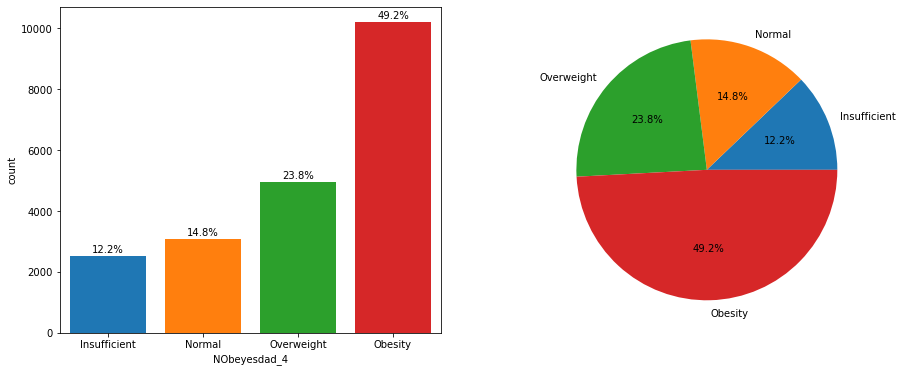

In [128]:
# NObeyesdad_4

fig, ax = plt.subplots(ncols=2, figsize=(15,6))

p = sns.countplot(data=df, x="NObeyesdad_4", saturation=1, ax=ax[0])
for patch in p.patches:
        p.annotate(format(patch.get_height() / df.shape[0] * 100, '.1f')+"%",
                   (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 7),
                   textcoords = 'offset points')
        
ax[1] = plt.pie(df["NObeyesdad_4"].value_counts(normalize=True, sort=False),
        labels=df["NObeyesdad_4"].value_counts(normalize=True, sort=False).index, 
        autopct='%.1f%%')

- target 변수의 범주별 비율은 모두 10~20% 사이로, 크게 차이 나지 않음.
- 그러나 해당 범주를 저체중/정상/과체중/비만 등 4개의 범주로 합하면 비율이 크게 차이남.
    - 과체중이 전체의 약 1/4, 비만이 전체의 약 1/2

## bmi
- NObeyesdad의 범주들이 bmi 분류와 상당히 유사함.
- 따라서 bmi값과 상관성이 높을 것으로 예상, Weight, Height 변수를 사용해 bmi 컬럼을 생성하고 비교함.

In [129]:
# 파생변수 생성 : bmi

df["bmi"] = df["Weight"]/(df["Height"]*df["Height"])

bins = [0, 18.5, 25, 30, 35, 40, 60]  # max = 54.99
labels = ["under","normal","over","obesity_1","obesity_2","obesity_3"]
df["bmi_class"] = pd.cut(df["bmi"], right=False, bins=bins, labels=labels)

df[["Weight","Height","bmi","bmi_class"]].head()

,Weight,Height,bmi,bmi_class
id,,,,
0,81.669950,1.699998,28.259565,over
1,57.000000,1.560000,23.422091,normal
2,50.165754,1.711460,17.126706,under
3,131.274851,1.710730,44.855798,obesity_3
4,93.798055,1.914186,25.599151,over


<AxesSubplot:xlabel='NObeyesdad', ylabel='bmi'>

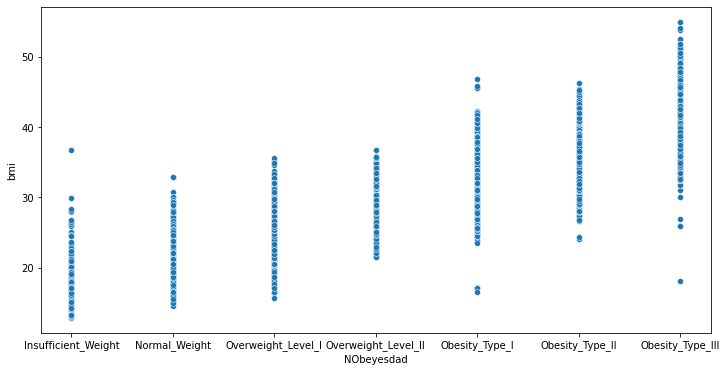

In [130]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="NObeyesdad", y="bmi")

<AxesSubplot:xlabel='NObeyesdad', ylabel='bmi'>

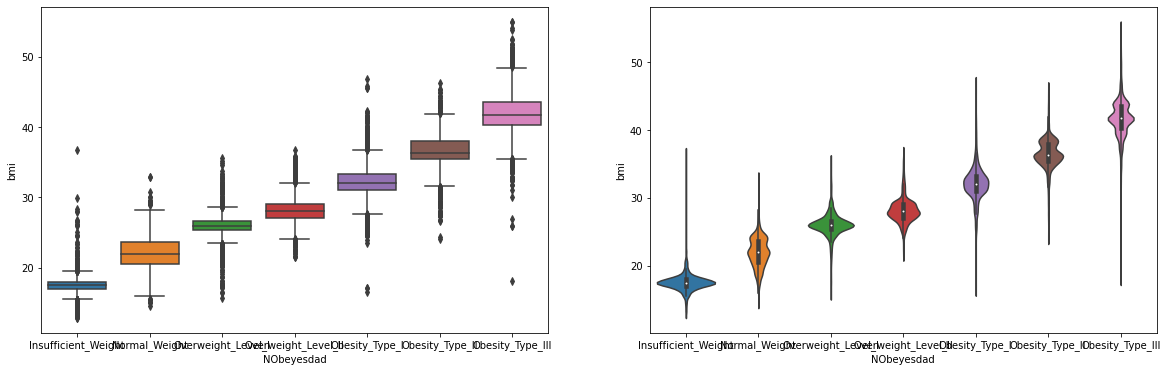

In [131]:
fig, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.boxplot(data=df, x="NObeyesdad", y="bmi", ax=axes[0])
sns.violinplot(data=df, x="NObeyesdad", y="bmi", ax=axes[1])

- 예상 외로, 동명의 bmi에 해당하지 않는 이상치들(violinplot에서 긴 꼬리에 해당하는 값)이 굉장히 많이 나옴.

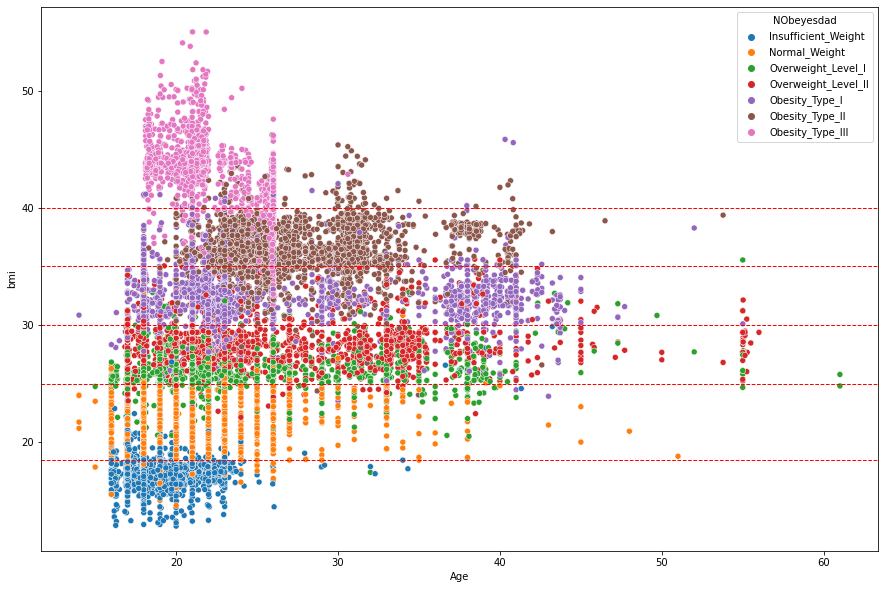

In [132]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Age", y="bmi", hue="NObeyesdad")

for bin in bins[1:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

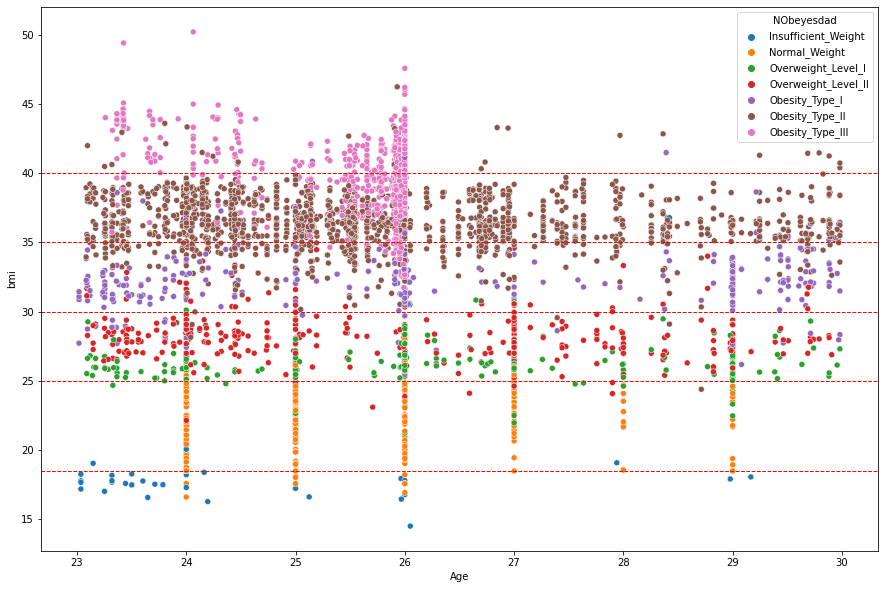

In [133]:
# 23~30세 사이 데이터 확인

plt.figure(figsize=(15,10))
sns.scatterplot(data=df[(df["Age"]>23)&(df["Age"]<30)], x="Age", y="bmi", hue="NObeyesdad")

for bin in bins[1:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

- Age가 25~26세인 경우에, bmi가 40 미만임에도 3단계 비만인 케이스가 많음(세로줄 형태)
- 결측치 처리 등의 이유로 발생한 문제일지, 다른 요인이 작용했을지 알아볼 필요가 있을 듯

<AxesSubplot:xlabel='Weight', ylabel='bmi'>

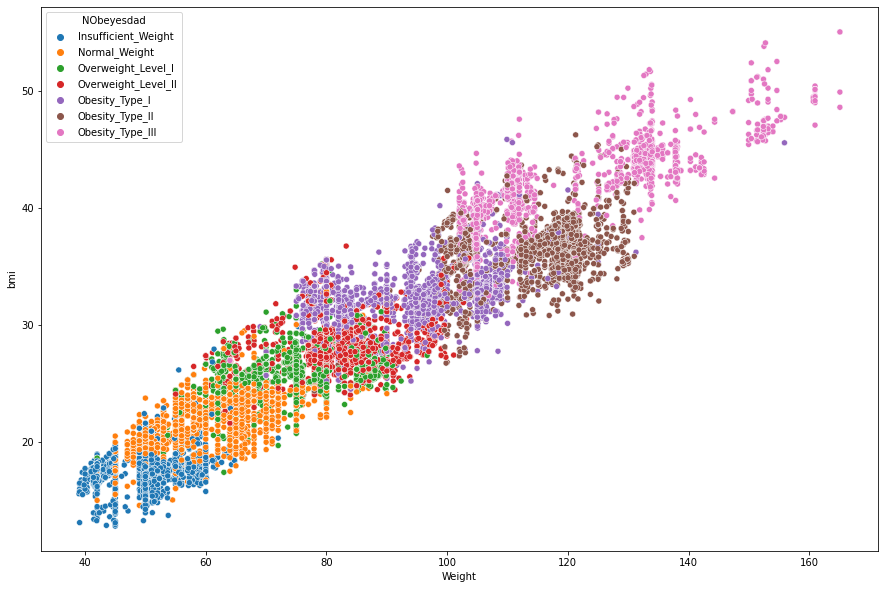

In [134]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="Weight", y="bmi", hue="NObeyesdad")

### 25~26세 사이, bmi<40이면서 obesity3인 데이터

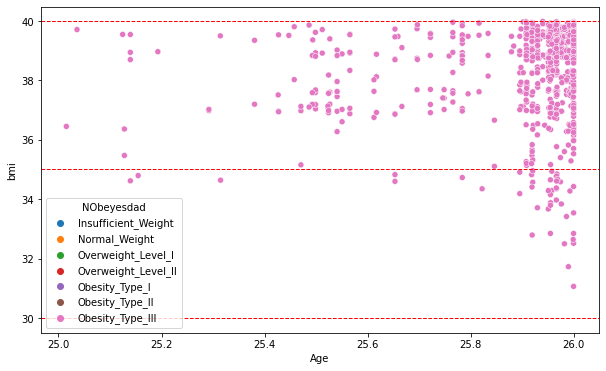

In [149]:
df_26_ob3 = df[(df["Age"]>25) & (df["Age"]<=26) & (df["bmi"]<40) & (df["NObeyesdad"]=="Obesity_Type_III")]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_26_ob3, x="Age", y="bmi", hue="NObeyesdad")

for bin in bins[3:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

In [167]:
df_26_ob3.shape

(828, 20)

In [168]:
df_26_ob3.nunique()

Gender                              2
Age                               110
Height                            292
Weight                            190
family_history_with_overweight      1
FAVC                                1
FCVC                                1
NCP                                 1
CAEC                                2
SMOKE                               2
CH2O                              349
SCC                                 1
FAF                               173
TUE                               311
CALC                                1
MTRANS                              1
NObeyesdad                          1
NObeyesdad_4                        1
bmi                               771
bmi_class                           2
dtype: int64

In [178]:
nuniq = df_26_ob3.nunique()
nuniq[nuniq>1]

Gender         2
Age          110
Height       292
Weight       190
CAEC           2
SMOKE          2
CH2O         349
FAF          173
TUE          311
bmi          771
bmi_class      2
dtype: int64

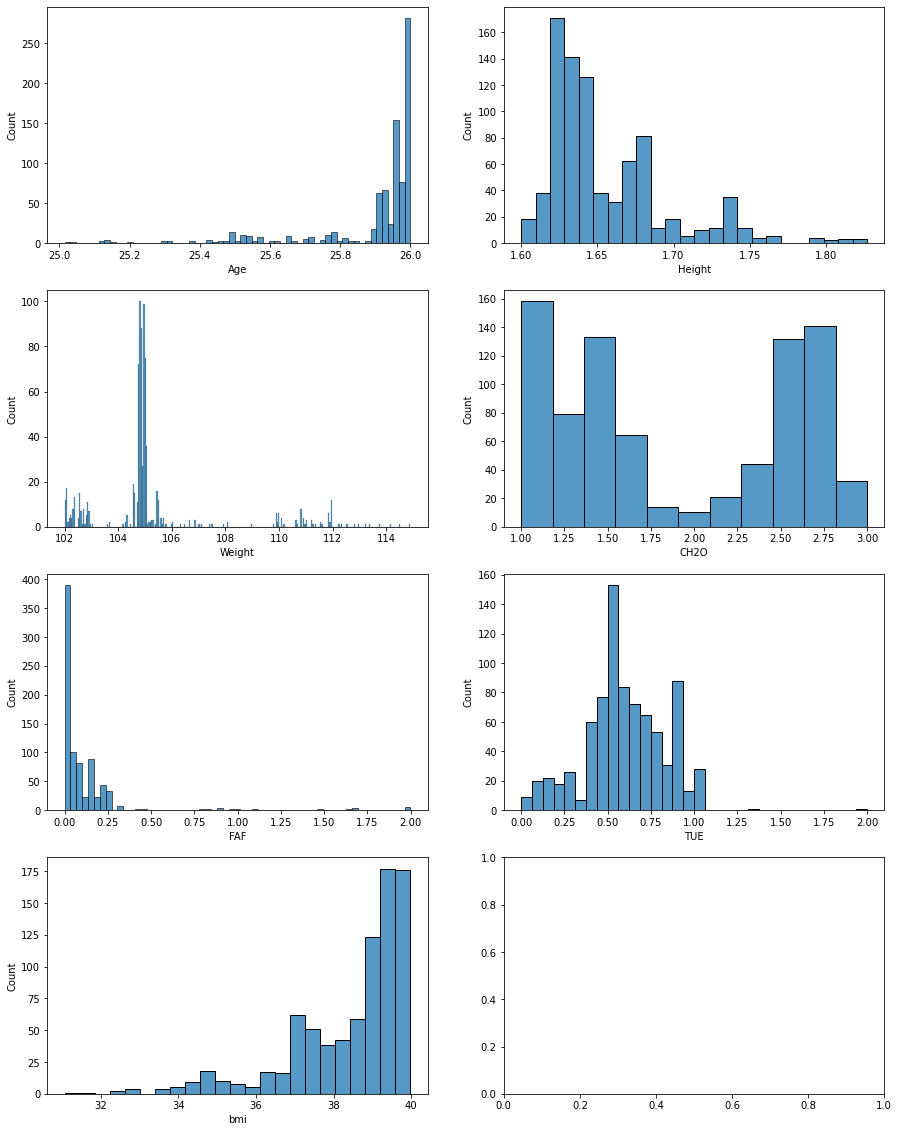

In [182]:
# 수치형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(nuniq[(nuniq>2)].index):
    sns.histplot(data=df_26_ob3[col_name], ax=axes[i//2, i%2])

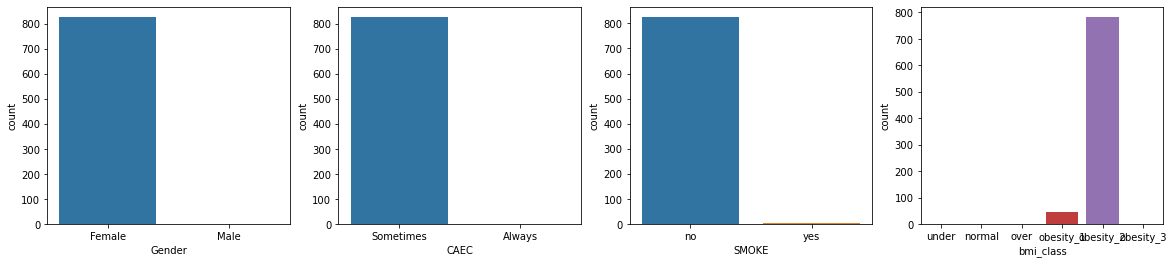

In [186]:
# 2개 범주
fig, axes = plt.subplots(ncols=4, figsize=(20,4))

for i, col_name in enumerate(nuniq[(nuniq==2)].index):
    sns.countplot(data=df_26_ob3, x=col_name, ax=axes[i])

In [187]:
for col in nuniq[(nuniq==2)].index:
    print(df_26_ob3[col].value_counts(),"\n")

Female    827
Male        1
Name: Gender, dtype: int64 

Sometimes    827
Always         1
Name: CAEC, dtype: int64 

no     826
yes      2
Name: SMOKE, dtype: int64 

obesity_2    783
obesity_1     45
under          0
normal         0
over           0
obesity_3      0
Name: bmi_class, dtype: int64 



#### Gender == Male

In [165]:
df_26_ob3[df_26_ob3["Gender"]=="Male"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_4,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,,,
6909,Male,26.0,1.82697,111.946321,yes,yes,3.0,3.0,Sometimes,no,2.679137,no,0.0,0.162494,Sometimes,Public_Transportation,Obesity_Type_III,Obesity,33.538759,obesity_1


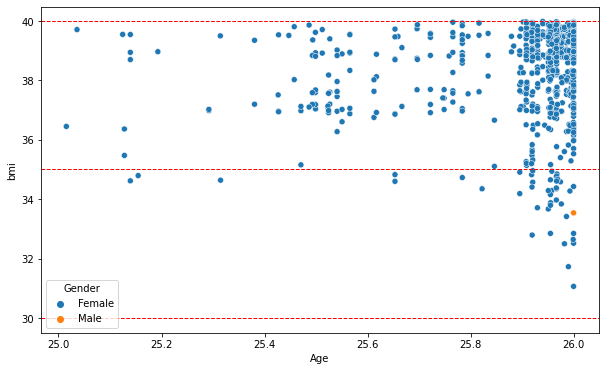

In [221]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_26_ob3, x="Age", y="bmi", hue="Gender")

for bin in bins[3:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

#### CAEC == Always

In [188]:
df_26_ob3[df_26_ob3["CAEC"]=="Always"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_4,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,,,
13381,Female,26.0,1.6,102.0,yes,yes,3.0,3.0,Always,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Obesity_Type_III,Obesity,39.84375,obesity_2


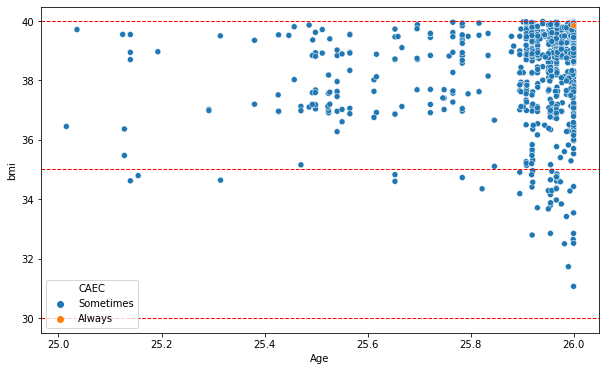

In [228]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_26_ob3.sort_values("CAEC", ascending=False), x="Age", y="bmi", hue="CAEC")

for bin in bins[3:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

#### SMOKE == Yes

In [198]:
df_26_ob3[df_26_ob3["SMOKE"]=="yes"]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_4,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,,,
5287,Female,26.0,1.697421,111.267334,yes,yes,3.0,3.0,Sometimes,yes,2.632253,no,0.0,0.243338,Sometimes,Public_Transportation,Obesity_Type_III,Obesity,38.617890,obesity_2
10630,Female,26.0,1.632193,105.037463,yes,yes,3.0,3.0,Sometimes,yes,2.523793,no,0.0,0.621605,Sometimes,Public_Transportation,Obesity_Type_III,Obesity,39.427678,obesity_2


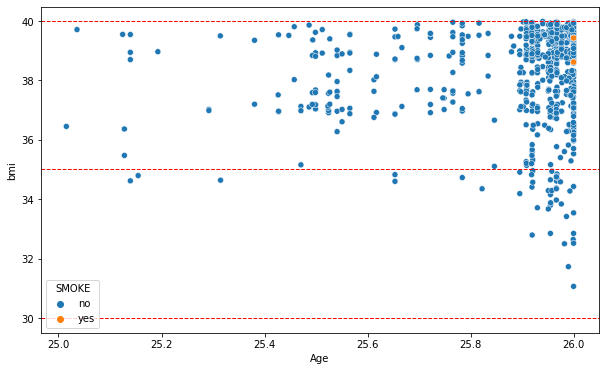

In [225]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_26_ob3.sort_values("SMOKE"), x="Age", y="bmi", hue="SMOKE")

for bin in bins[3:-1]:
    plt.axhline(y=bin, color = 'red', linestyle ='--', linewidth=1)

In [235]:
# 1개 범주
for col in nuniq[nuniq==1].index[:-2]: # NObeyesdad, NObeyesdad4 제외
    print(df_26_ob3[col].value_counts(), "\n")

yes    828
Name: family_history_with_overweight, dtype: int64 

yes    828
Name: FAVC, dtype: int64 

3.0    828
Name: FCVC, dtype: int64 

3.0    828
Name: NCP, dtype: int64 

no    828
Name: SCC, dtype: int64 

Sometimes    828
Name: CALC, dtype: int64 

Public_Transportation    828
Name: MTRANS, dtype: int64 



- 예외 데이터들은 모두 26.0세에서 발견됨.
- 예외가 발생한 변수는 성별, 간식, 흡연 여부
- 25~26세 데이터 중 범주가 1개뿐인 변수는 가족력, 고칼로리섭취빈도, 야채섭취빈도, 끼니수, 칼로리소비모니터링, 주류소비, 교통수단의 총 7개로, 생활 및 식습관이 굉장히 유사하다.
- 같은 지역 거주로 비슷한 환경을 가진 학생들이 아닐까하는 예상을 해볼 수 있다.

## 각 변수별 target값 확인

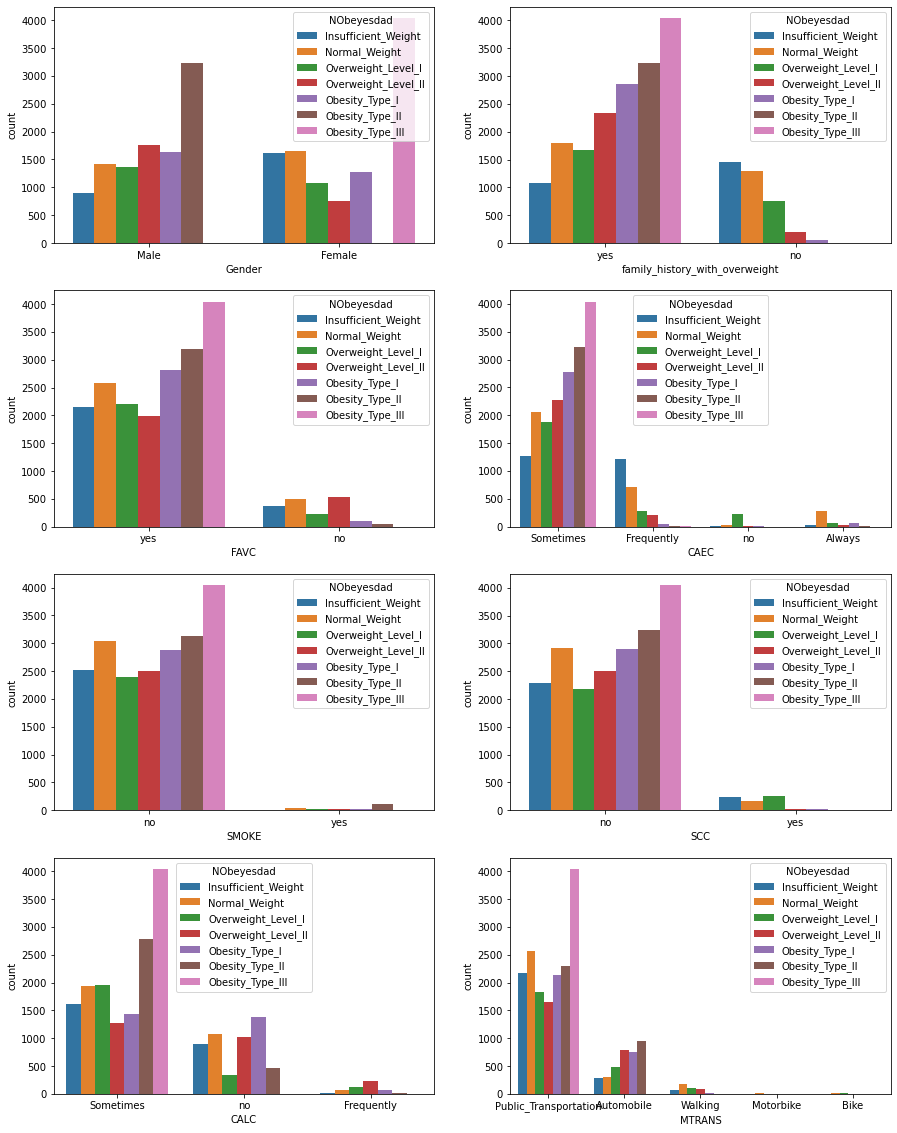

In [137]:
# 범주형 변수
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for i, col_name in enumerate(cat_list[:-1]):
    sns.countplot(data=df, x=col_name, hue="NObeyesdad", ax=axes[i//2, i%2])

In [237]:
df[["NObeyesdad","Gender"]].value_counts(sort=False)

NObeyesdad           Gender
Insufficient_Weight  Female    1621
                     Male       902
Normal_Weight        Female    1660
                     Male      1422
Overweight_Level_I   Female    1070
                     Male      1357
Overweight_Level_II  Female     755
                     Male      1767
Obesity_Type_I       Female    1267
                     Male      1643
Obesity_Type_II      Female       8
                     Male      3240
Obesity_Type_III     Female    4041
                     Male         5
dtype: int64

- 그래프상으로 2형 비만은 여자가 없고 3형 비만은 남자가 없는 줄 알았는데, 사실은 수가 매우 적을뿐 데이터는 있었다.

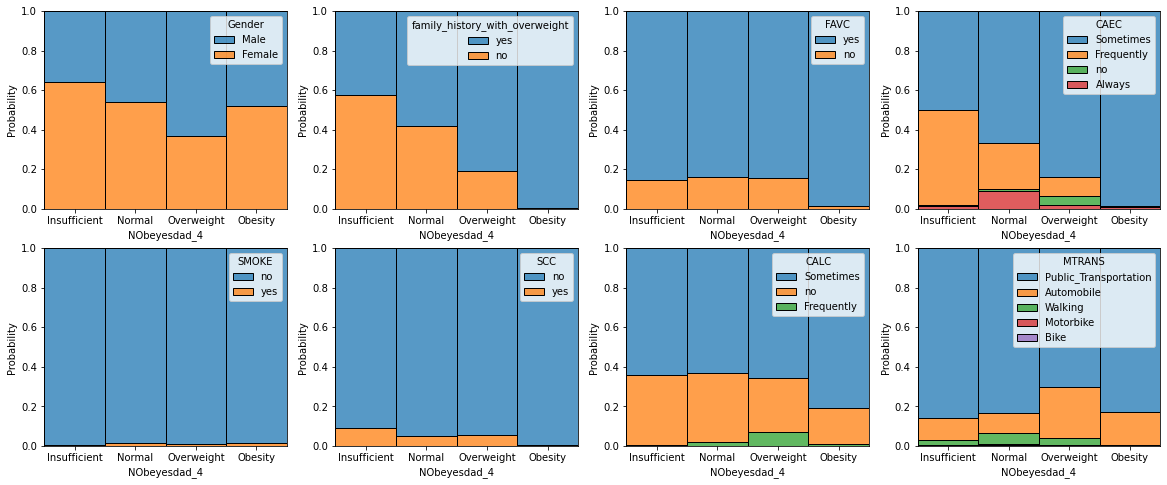

In [255]:
# 범주형 변수
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

for i, col_name in enumerate(cat_list[:-1]):
    sns.histplot(data=df, x="NObeyesdad_4", hue=col_name,
                 multiple="fill", stat="probability", ax=axes[i//4, i%4])

- Gender : 남성일 때 과체중이 많고, 여성일 때 비만이 많음
- family_history : 가족력이 있을 경우 비만으로 가는 확률이 높음
- FAVC : 고칼로리 음식을 자주 섭취하면 비만이 될 확률 높음
- CAEC : 간식 섭취. 오히려 비만인 경우 간식 섭취가 잦지 않고, 저체중과 정상체중일 때 간식 섭취를 자주 하거나 항상 함. 이는 비만인 사람은 식사 때 폭식하기 때문일 수 있음.
- SMOKE : 흡연은 큰 영향을 미치지 않는 듯 하다.
- SCC : 비만인 경우 칼로리 섭취 모니터링하는 경우 거의 없음.
- CALC : 음주를 자주 하는 경우 과체중일 확률 높음. 오히려 비만인 경우 음주를 자주 하지는 않는데, 건강 때문이거나 성별의 문제일수도.
- MTRANS : 비만일 때는 걷는 경우 거의 없음. 상대적으로 과체중과 비만일 때 자동차 타는 비율 높음

## 라벨 인코딩

In [140]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [141]:
cat_list

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [142]:
le_df = pd.DataFrame()

for col in cat_list:
    encoded = le.fit_transform(df[col])
    le_df[col+"_le"] = encoded
le_df

,Gender_le,family_history_with_overweight_le,FAVC_le,CAEC_le,SMOKE_le,SCC_le,CALC_le,MTRANS_le,NObeyesdad_le
0,1,1,1,2,0,0,1,3,6
1,0,1,1,1,0,0,2,0,1
2,0,1,1,2,0,0,2,3,0
3,0,1,1,2,0,0,1,3,4
4,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...
20753,1,1,1,2,0,0,1,3,3
20754,1,0,1,1,0,0,1,3,0
20755,1,1,1,2,0,0,2,3,3
20756,1,1,1,2,0,0,2,0,6


In [143]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_4,bmi,bmi_class
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Overweight,28.259565,over
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,Normal,23.422091,normal
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,Insufficient,17.126706,under
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Obesity,44.855798,obesity_3
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Overweight,25.599151,over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Obesity,36.587084,obesity_2
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Insufficient,17.099278,under
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,Obesity,31.889841,obesity_1


## 상관계수

In [144]:
corr = df.corr()
corr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,bmi
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154,0.320842
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433,0.098126
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471,0.941071
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843,0.296933
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459,0.048736
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654,0.292142
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213,-0.210239
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000,-0.117098
bmi,0.320842,0.098126,0.941071,0.296933,0.048736,0.292142,-0.210239,-0.117098,1.000000


<AxesSubplot:>

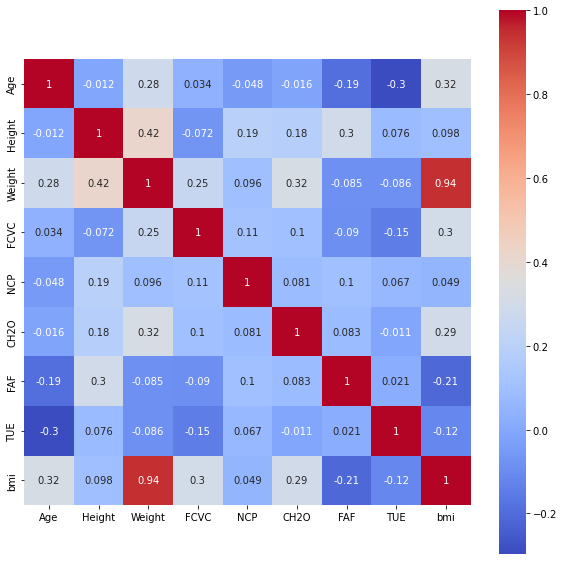

In [145]:
# 히트맵으로 상관계수 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True)
# plt.title('Correlation Matrix of Numeric Features')
# plt.show()

In [146]:
# Cramer's V



# End

[해볼 것]
1. EDA
- 수치형 변수들 범주화하기
    - Age
    - 소수점으로 나오는 것들 정수화
- 라벨인코딩
- 상관계수 구하기

2. 알고리즘
- 다중분류 알고리즘 찾아보기
- 다른 사람들 코드 찾아보기